# Set up

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors as mcolors 
import math 
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D 
%config InlineBackend.figure_format='retina'

In [76]:
data = pd.read_csv('IQTable2.csv')
X_Std = pd.DataFrame(StandardScaler().fit_transform(data))
X_std = X_Std.iloc[:70, :]

# from sklearn.cluster import KMeans 
clusters = 4
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(X_std) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_std)
  
pca_data = pd.DataFrame(principalComponents) 


In [83]:

# Generating different colors in ascending orderof their hsv values '''
colors = list(zip(*sorted(( 
                    tuple(mcolors.rgb_to_hsv( 
                          mcolors.to_rgba(color)[:3])), name) 
                     for name, color in dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS ).items())))[1] 
   
   
# number of steps to taken generate n(clusters) colors  
skips = math.floor(len(colors[5 : -5])/clusters) 
cluster_colors = colors[5 : -5 : skips] 

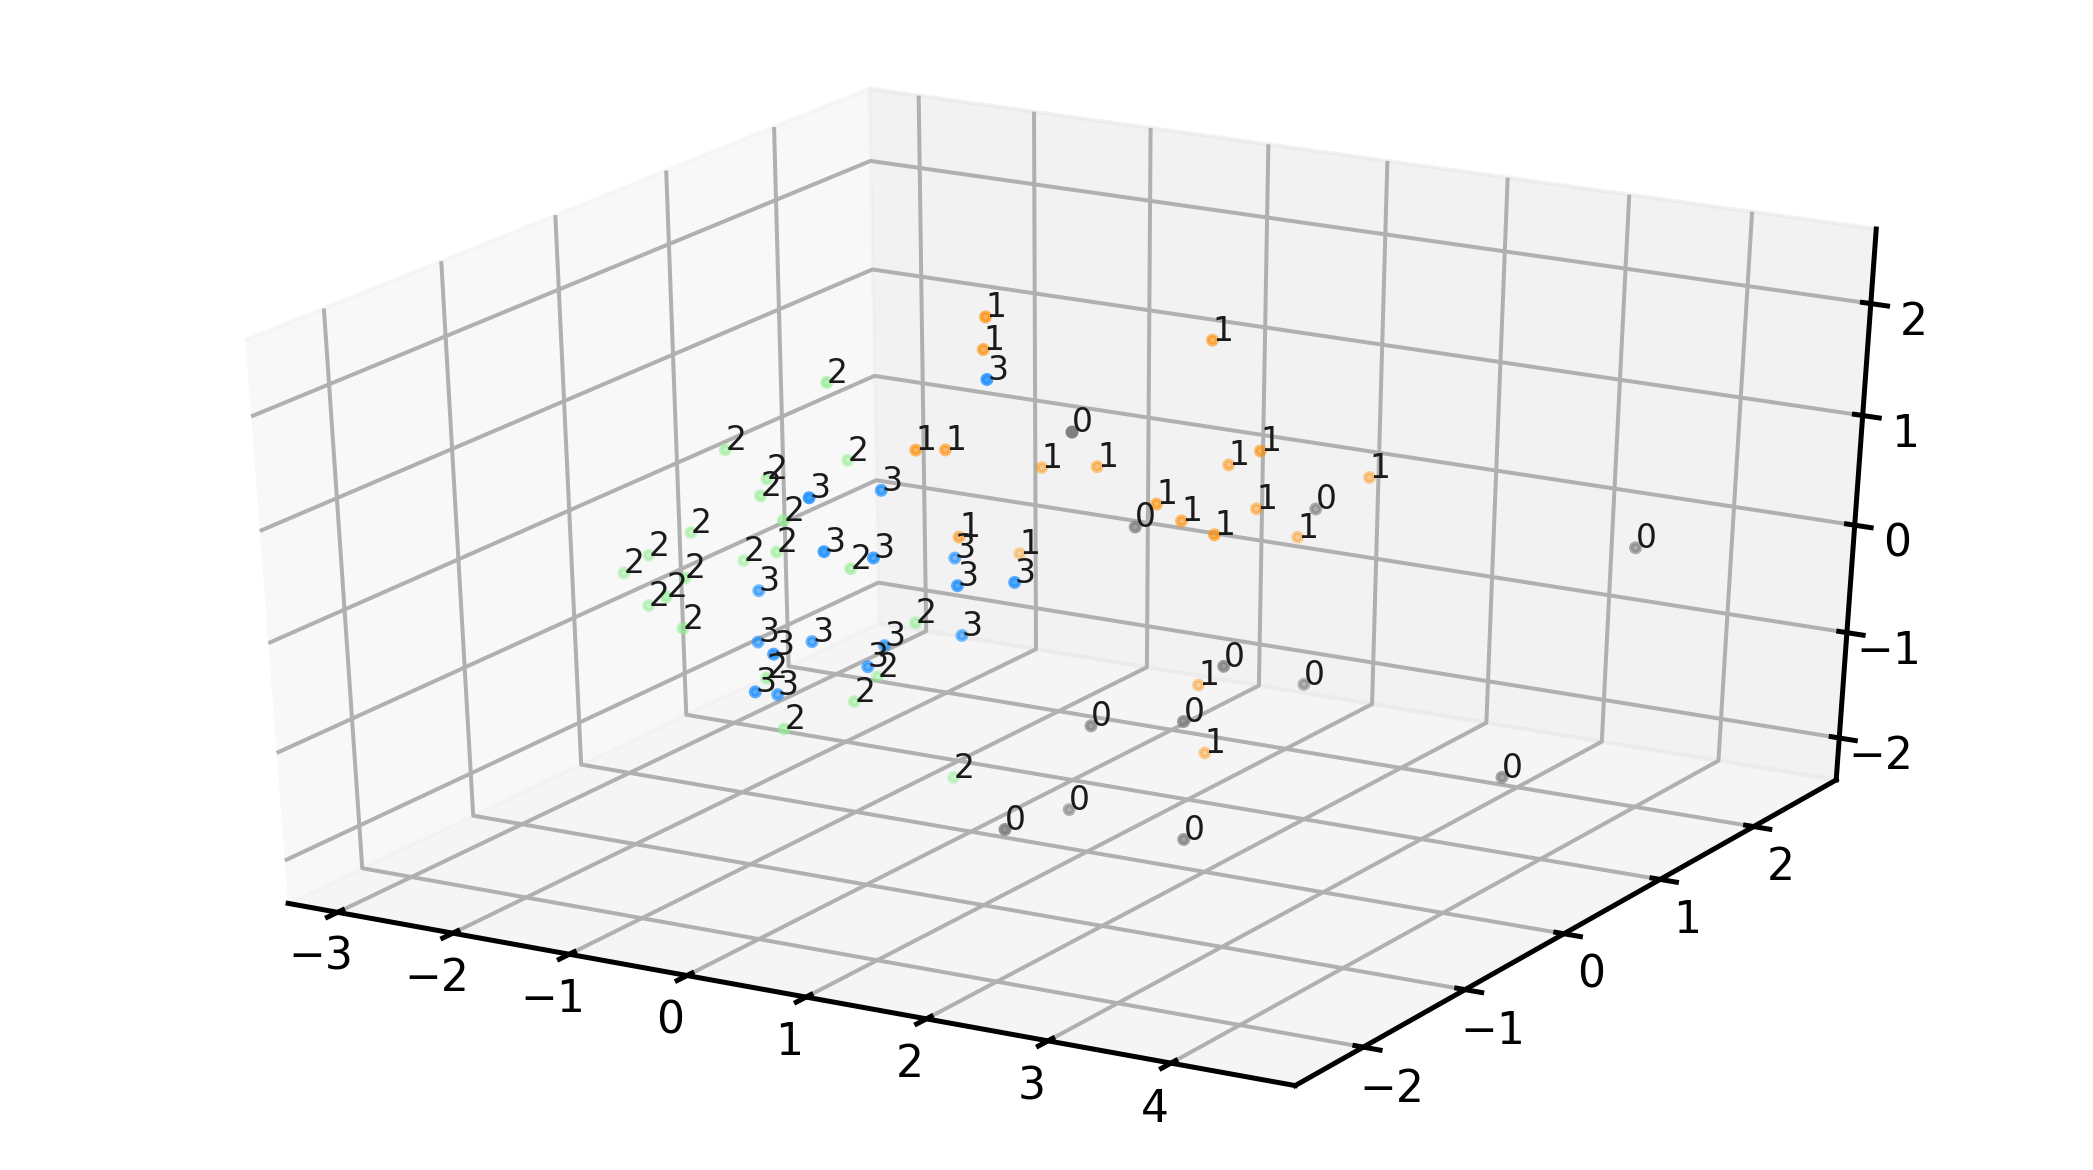

In [85]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_subplot(111, projection = '3d') 
ax.scatter(pca_data[0], pca_data[1], pca_data[2],  
           c = list(map(lambda label : cluster_colors[label], 
                                            kmeans.labels_))) 
   
str_labels = list(map(lambda label:'% s' % label, kmeans.labels_)) 
   
list(map(lambda data1, data2, data3, str_label: 
        ax.text(data1, data2, data3, s = str_label, size = 16.5, 
        zorder = 20, color = 'k'), pca_data[0], pca_data[1], 
        pca_data[2], str_labels)) 
   
plt.show()